<a href="https://colab.research.google.com/github/Pataweepr/scb_TS_course/blob/main/decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [ ]:
def test_stationarity(timeseries, window=12, main_col_name='#Passengers', autolag='AIC'):
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=window).mean()
    movingSTD = timeseries.rolling(window=window).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    mean_plus_std = plt.plot(movingAverage + movingSTD, color='green', label='estimate range (Mean+Std)')
    mean_minus_std = plt.plot(movingAverage - movingSTD, color='green', label='estimate range (Mean-Std)')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries[main_col_name], autolag=autolag)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

In [ ]:
path = "AirPassengers.csv" #For local
# path = "AirPassengers.csv" #For Kaggle
dataset = pd.read_csv(path)
#Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = dataset.set_index(['Month'])
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


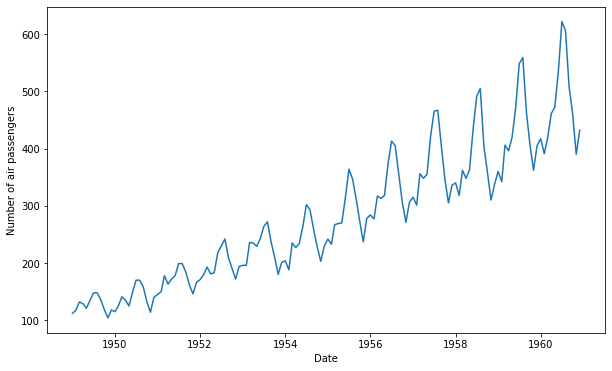

In [ ]:
## plot graph
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

In [ ]:
rolmean = indexedDataset.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


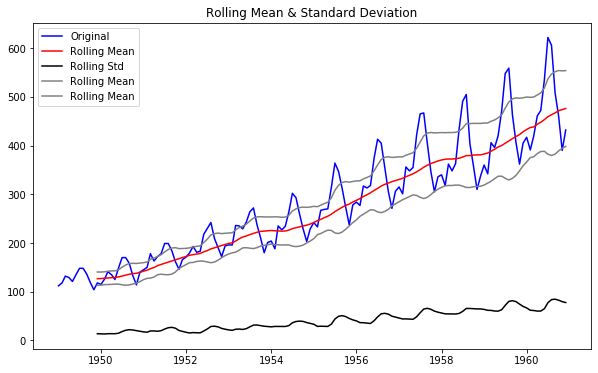

In [ ]:
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')

range_of_val_up  = plt.plot(rolmean + rolstd, color='gray', label='Rolling Mean')
range_of_val_down  = plt.plot(rolmean - rolstd, color='gray', label='Rolling Mean')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
ss_decomposition_multi = seasonal_decompose(x=indexedDataset, 
                                            model='multiplicative', 
                                            period=8)

estimated_trend_multi = ss_decomposition_multi.trend
estimated_seasonal_multi = ss_decomposition_multi.seasonal
estimated_residual_multi = ss_decomposition_multi.resid

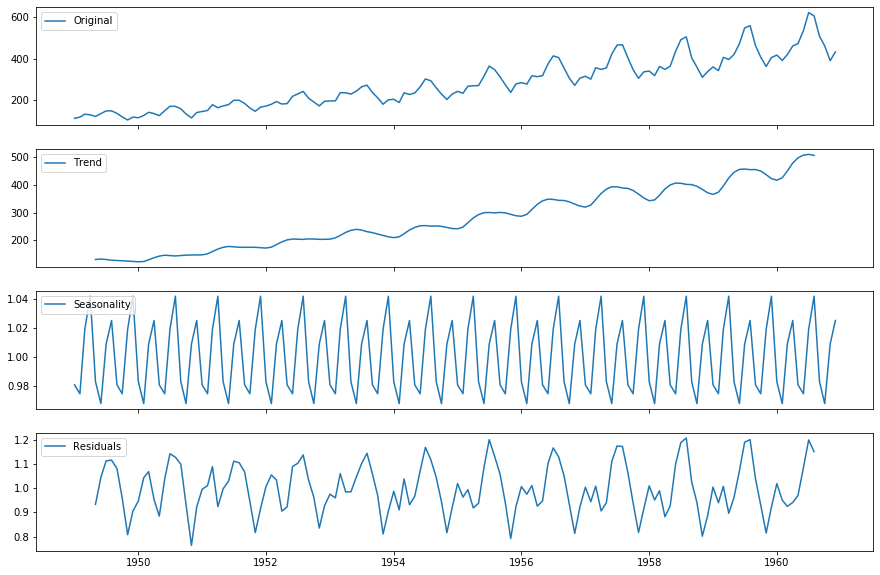

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(indexedDataset, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend_multi, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal_multi, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual_multi, label='Residuals')
axes[3].legend(loc='upper left');

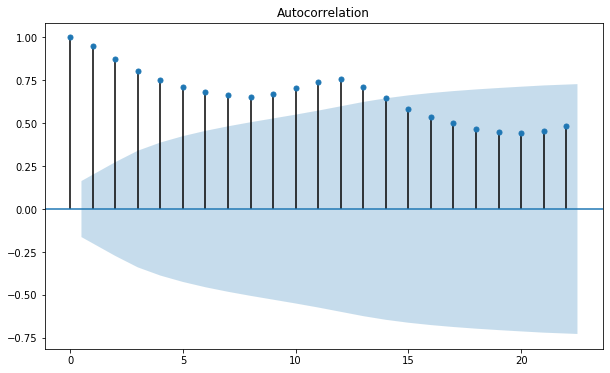

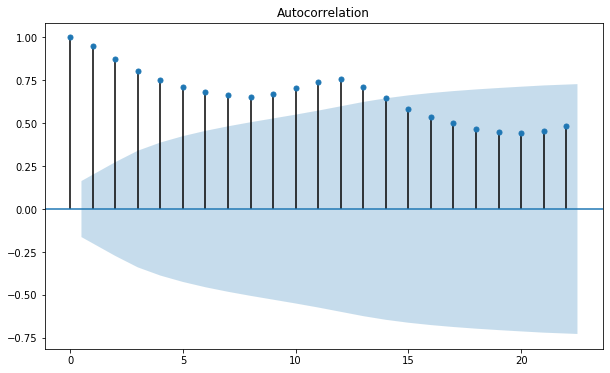

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(indexedDataset)

# Decomposition log scale

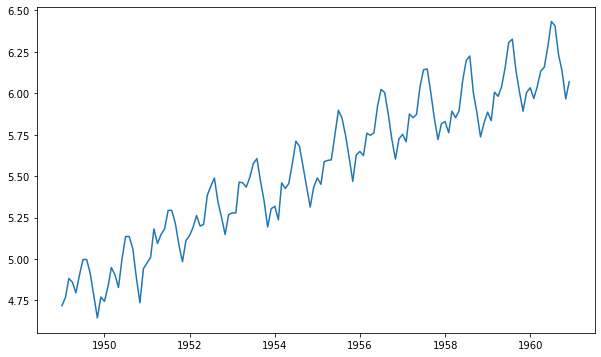

In [ ]:
indexedDataset_logScale = np.log(indexedDataset)
# plt.plot(indexedDataset_logScale)


rolmean = indexedDataset_logScale.rolling(window=12).mean() 

rolstd = indexedDataset_logScale.rolling(window=12).std()

In [ ]:
# rolmean

In [ ]:
# rolstd

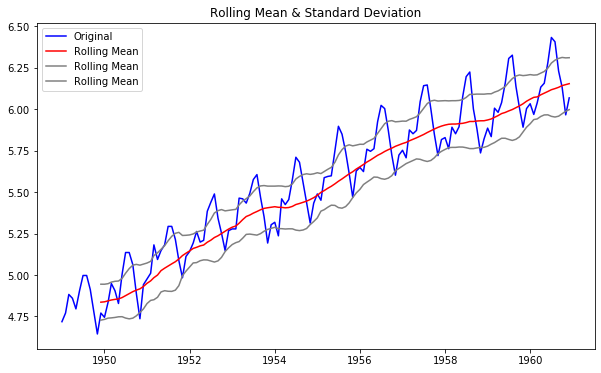

In [ ]:



orig = plt.plot(indexedDataset_logScale, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
# std = plt.plot(rolstd, color='black', label='Rolling Std')

range_of_val_up  = plt.plot(rolmean + rolstd, color='gray', label='Rolling Mean')
range_of_val_down  = plt.plot(rolmean - rolstd, color='gray', label='Rolling Mean')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

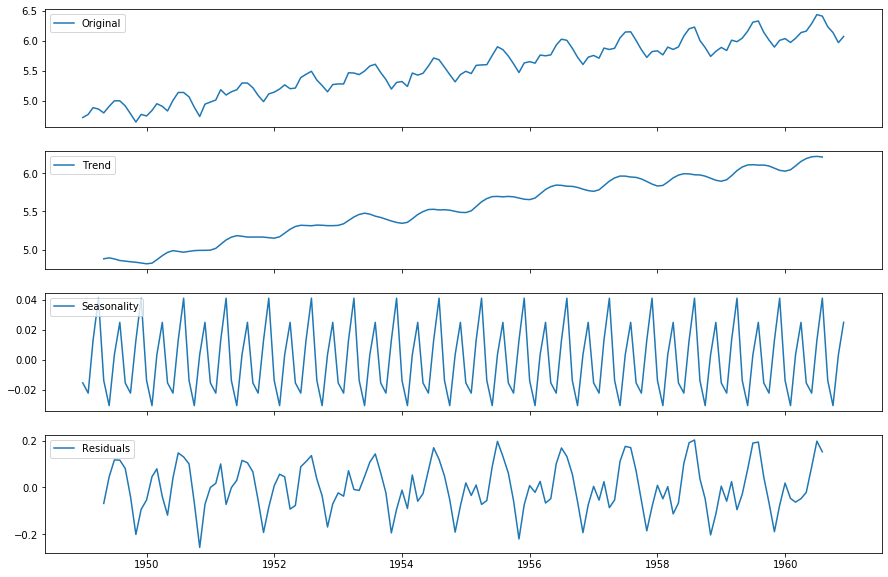

In [ ]:
ss_decomposition_addition = seasonal_decompose(x=indexedDataset_logScale, 
                                            model='additive', 
                                            period=8)

estimated_trend_addition = ss_decomposition_addition.trend
estimated_seasonal_addition = ss_decomposition_addition.seasonal
estimated_residual_addition = ss_decomposition_addition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(indexedDataset_logScale, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend_addition, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal_addition, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual_addition, label='Residuals')
axes[3].legend(loc='upper left');